In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
%matplotlib inline
import xarray as xr
from xmovie import Movie

ds = xr.tutorial.open_dataset('air_temperature').isel(time=slice(0,150))
mov = Movie(ds.air)

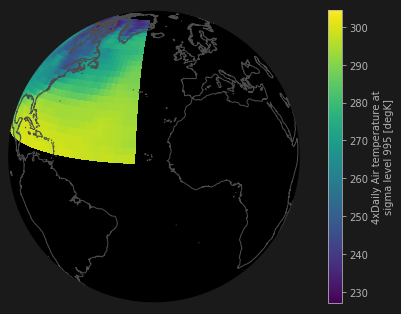

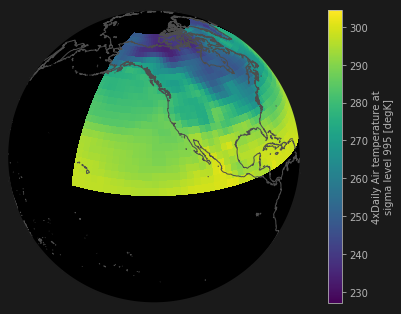

In [19]:
# preview 10th frame
mov.preview(10)
# preview 100th frame. Note the rotation
mov.preview(100)

In [4]:
mov.save('movie.gif', remove_movie=False, progress=True)

100%|██████████| 150/150 [02:06<00:00,  1.07s/it]


Movie created at movie.mp4
GIF created at movie.gif


In [5]:
from xmovie.presets import rotating_globe_dark
mov = Movie(ds.air, rotating_globe_dark, plotmethod='contourf', coastline=False, land=True)
mov.save('movie_contf.gif')

Movie created at movie_contf.mp4
GIF created at movie_contf.gif


In [6]:
mov = Movie(ds.air, rotating_globe_dark, plotmethod='contour', coastline=False, land=True)
mov.save('movie_cont.gif')

/Users/juliusbusecke/Work/CODE/PYTHON/xmovie/xmovie/presets.py:32: UserWarning: No plot_variable supplied. Defaults to `air`
  UserWarning,


Movie created at movie_cont.mp4
GIF created at movie_cont.gif


In [7]:
import numpy as np
ds = xr.tutorial.open_dataset('rasm').Tair

# Interpolate time for smoother animation
ds['time'].data = np.arange(len(ds['time']))
ds = ds.interp(time=np.linspace(0,10, 60))

mov = Movie(ds, rotating_globe_dark,
            cmap='RdYlBu_r',
            x='xc',
            y='yc', #accepts keyword arguments from the xarray plotting interface
            lat_start=45, # Custom keywords from `rotating_globe_dark
            lon_rotations=0.2)
mov.save('movie_rasm.gif')

Movie created at movie_rasm.mp4
GIF created at movie_rasm.gif


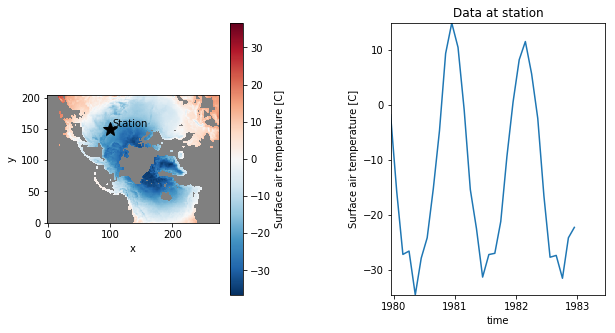

In [20]:
# some awesome static plot
import matplotlib.pyplot as plt

ds = xr.tutorial.open_dataset('rasm').Tair
fig = plt.figure(figsize=[10,5])
tt = 30

station = dict(x=100, y=150)
ds_station = ds.sel(**station)

(ax1, ax2) = fig.subplots(ncols=2)
ds.isel(time=tt).plot(ax=ax1)
ax1.plot(station['x'], station['y'], marker='*', color='k' ,markersize=15)
ax1.text(station['x']+4, station['y']+4, 'Station', color='k' )
ax1.set_aspect(1)
ax1.set_facecolor('0.5')
ax1.set_title('');

# Time series
ds_station.isel(time=slice(0,tt+1)).plot.line(ax=ax2, x='time')
ax2.set_xlim(ds.time.min().data, ds.time.max().data)
ax2.set_ylim(ds_station.min(), ds_station.max())
ax2.set_title('Data at station');

fig.subplots_adjust(wspace=0.6)

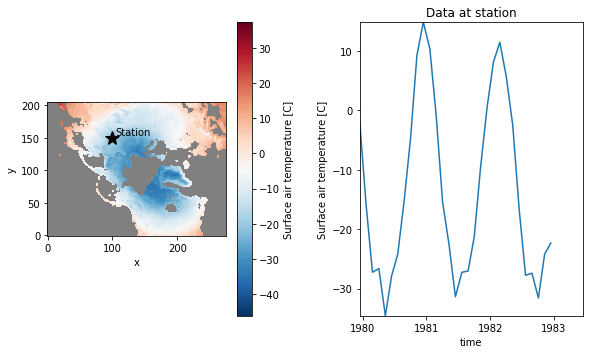

In [26]:
def custom_plotfunc(ds, fig, tt):
    # Define station location for timeseries
    station = dict(x=100, y=150)
    ds_station = ds.sel(**station)

    (ax1, ax2) = fig.subplots(ncols=2)
    
    # Map axis
    # Colorlimits need to be fixed or your video is going to cause seizures.
    # This is the only modification from the code above!
    ds.isel(time=tt).plot(ax=ax1, vmin=ds.min(), vmax=ds.max(), cmap='RdBu_r')
    ax1.plot(station['x'], station['y'], marker='*', color='k' ,markersize=15)
    ax1.text(station['x']+4, station['y']+4, 'Station', color='k' )
    ax1.set_aspect(1)
    ax1.set_facecolor('0.5')
    ax1.set_title('');

    # Time series
    ds_station.isel(time=slice(0,tt+1)).plot.line(ax=ax2, x='time')
    ax2.set_xlim(ds.time.min().data, ds.time.max().data)
    ax2.set_ylim(ds_station.min(), ds_station.max())
    ax2.set_title('Data at station');

    fig.subplots_adjust(wspace=0.4)

dss = xr.tutorial.open_dataset('rasm').Tair
mov_custom = Movie(dss, custom_plotfunc)
mov_custom.preview(30)

In [27]:
mov_custom.save('movie_custom.gif') 

Movie created at movie_custom.mp4
GIF created at movie_custom.gif


In [ ]:
import xarray as xr
from xmovie import Movie

## TODO for this feature
- [x] Clean up progress/verbose kwargs. I need fine grained control over frame progress and ffmpeg progress.
- [x] Start CI

## Pushed to next feature branch:
- [ ] Start Docs
- [ ] Add automatic gif conversion???
- [ ] Expand options for ffmpeg conversion + gif conversion
- [ ] Trigger all warnings that come with the plotfunction with an example frame (invisible)

# Documentation
## Basic use

In [ ]:
# Load example dataset
ds = xr.tutorial.open_dataset('air_temperature').load().isel(time=slice(0,20))
ds['airx4'] = ds['air'] * 4
ds

### Setting up the movie object

The simplest way to create a movie is to pass a dataarray to `Movie`.
You can simply preview the movie frame with the `Movie.preview` function.

In [ ]:
mov = Movie(ds.air)
mov.preview(10);
# I havent figured out how to return a fig from `Movie.preview` without it plotting twice...

If a dataset is supplied, xmovie chooses the first data_variable.

In [ ]:
mov = Movie(ds)
mov.preview(10);

You can choose which variable to plot with `plot_variable`. This will enable to visualize several variables at the same time (feature not quite ready yet, but coming soon).

In [ ]:
mov = Movie(ds, plot_variable='airx4')
mov.preview(10);

## Creating a movie
Now you can save out a movie

In [ ]:
mov.save('movie.mp4') #Thats it!

In [ ]:
from IPython.display import HTML
HTML("""
<video width="500" controls>
  <source src="movie.mp4" type="video/mp4">
</video>
""")

# How can I display this easily in the docs?

You can also create a gif animation simply by changing the output filename extension to `.gif`.
> The gif is created by first creating a movie and then converting it. If you choose the same filename as an existing movie, you will get an Error

In [ ]:
mov.save('animation.gif')

Rendering out all frames can take a while, especially with higher resolution fields. With the optional depenceny `tqdm` you can display a progress bar.

In many cases it is useful to have both a high quality movie and a lower resolution gif of the same animation. If that is desired, just deactivate the `remove_movie` option and give a filename with `.gif`. xmovie will first render a high quality movie and then convert it to a gif, without removing the movie afterwards.

In [ ]:
mov.save('movie_progress.mp4', progress=True)

In [ ]:
mov.save('combo.gif',remove_movie=False)